In [1]:
from configparser import ConfigParser
import numpy as np
import matplotlib.pyplot as plt
from isoline_analysis_delta_r0 import isoline_properties_single_simulation

## Process the results from a set of combined annulus and rectangular simulations

### Get data from the annulus

In [3]:
config = ConfigParser()
filepath = './realisations/base-halfannulus/'
config.read(filepath + 'config.ini')

config2 = ConfigParser()
filepath = './realisations/base-rectangle/'
config2.read(filepath + 'config.ini')

['./realisations/base-rectangle/config.ini']

In [4]:
config = ConfigParser()
filepath = './realisations/base-halfannulus/'
config.read(filepath + 'config.ini')
angles = []
rs = []
speeds = []
ang_vels = []
ang_vels_max = []
ang_vels_min = []
ts = np.linspace(0.01, 12, 1200)
times = []
for t in ts:
    iso_coords = isoline_properties_single_simulation(config, filepath, time=t)
    times.append(np.ones_like(iso_coords['th']))
    angles.append(iso_coords['th'])
    rs.append(iso_coords['r'])
    ang_vels.append(np.mean(iso_coords['tang_velocity']))
    ang_vels_max.append(np.max(iso_coords['tang_velocity']))
    ang_vels_min.append(np.min(iso_coords['tang_velocity']))


In [5]:
config2 = ConfigParser()
filepath = './realisations/base-rectangle/'
config2.read(filepath + 'config.ini')
xs = []
ys = []
vels = []
ts = np.linspace(0.01, 12, 1200)
times_rect = []
for t in ts:
    iso_coords = isoline_properties_single_simulation(config2, filepath, time=t, annulus=False)
    times.append(np.ones_like(iso_coords['x']))
    xs.append(iso_coords['x'])
    ys.append(iso_coords['y'])
    vels.append(np.mean(iso_coords['speed']))
    #print(np.max(iso_coords['speed'] - np.min(iso_coords['speed'])))


KeyError: 'No data associated with u_time=24.4898 found in ./realisations/base-rectangle/soln.bp'

### Get data from the rectangle

IndexError: list index out of range

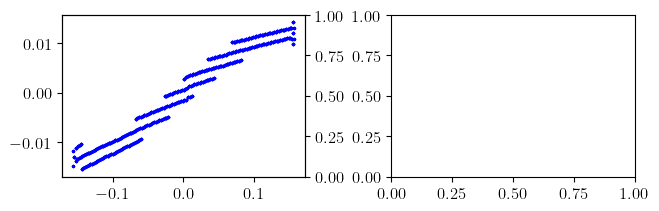

In [5]:
from simutils.vis import set_size
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rcParams['font.size'] = 12
fig, axs = plt.subplots(ncols=2, figsize=set_size(468, subplots=(1, 2), padding_adjustment=1), layout='constrained')
ax = axs[0]
ax2 = ax.twinx()
ax1 = axs[1]
interrogation_ts = [10.0]

for interr_t in interrogation_ts:
    t_idx = np.argmin(np.abs(ts - interr_t))
    ax.scatter(rs[t_idx] - config.getfloat('geometry', 'r0'), angles[t_idx] - np.mean(angles[t_idx]), color='blue', label=r'\textrm{annulus}', s=2)
    ax.scatter(ys[t_idx] - config2.getfloat('geometry', 'ly')/2, xs[t_idx] - np.mean(xs[t_idx]), color='red', label=r'\textrm{rectangle}', s=2)
ax.set_xlabel(r'$r - r_0$')
ax.set_ylabel(r'$\theta_i - \bar{\theta_i}$')
ax.set_ylim(-0.03, 0.03)
ax2.set_ylabel(r'$x_i - \bar{x_i}$')
ax.legend()


ax1.plot(ts, ang_vels, color='blue', label=r'$\bar{\omega}$ \textrm{(annulus)}')
ax1.fill_between(ts, ang_vels_min, ang_vels_max, color='gold', alpha=0.2)
ax1.plot(ts, vels, color='red', label=r'$v$ \textrm{(rectangle)}')
ax1.plot(ts, np.ones_like(ts)*2*np.sqrt(config.getfloat('param', 'D')*config.getfloat('param', 'k')), '--', color='magenta', label=r'$c_{\textrm{min}} \textrm{(infinite line)}$')
#ax1.plot(ts, np.ones_like(ts)*2*np.sqrt(config.getfloat('param', 'D')*config.getfloat('param', 'k'))/0.842)
#ax1.plot(ts, np.ones_like(ts)*2*np.sqrt(config.getfloat('param', 'D')*config.getfloat('param', 'k'))/1.158)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$\textrm{Speed}$')
ax1.set_xlim([0, 12])
ax1.set_ylim([0, 0.2])
ax1.spines['top'].set_visible(False)
ax1.legend()
#ax2.tick_params(
#    axis='y',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    right=False,      # ticks along the bottom edge are off
#    left=False,
#    labelright=False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.savefig('fig3_redone_lc=0.0025.pdf', bbox_inches='tight')
plt.show()
#plt.close(fig)